In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
%matplotlib inline

In [2]:
import os
os.listdir('data')

['application_test.csv',
 '.DS_Store',
 'HomeCredit_columns_description.csv',
 'POS_CASH_balance.csv',
 'credit_card_balance.csv',
 'installments_payments.csv',
 'application_train.csv',
 'bureau.csv',
 'previous_application.csv',
 'bureau_balance.csv',
 'sample_submission.csv']

In [3]:
df_train = pd.read_csv('data/application_train.csv')

In [4]:
df_test = pd.read_csv('data/application_test.csv')

In [5]:
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
def perc_null(col):
    print('\n', '-' * 50, col, '\n')
    train_null = len(df_train[df_train[col].isnull()])
    test_null = len(df_test[df_test[col].isnull()])
    if train_null == 0:
        print('Train: 0')
    else:
        print('Train: ', train_null)
        print(round(train_null/len(df_train), 3))
    if test_null == 0:
        print('Test: 0')
    else:
        print('Test: ', test_null)
        print(round(test_null/len(df_test), 3))

In [12]:
for col in df_train.columns.tolist()[2:]:
    perc_null(col)


 -------------------------------------------------- NAME_CONTRACT_TYPE 

Train: 0
Test: 0

 -------------------------------------------------- CODE_GENDER 

Train: 0
Test: 0

 -------------------------------------------------- FLAG_OWN_CAR 

Train: 0
Test: 0

 -------------------------------------------------- FLAG_OWN_REALTY 

Train: 0
Test: 0

 -------------------------------------------------- CNT_CHILDREN 

Train: 0
Test: 0

 -------------------------------------------------- AMT_INCOME_TOTAL 

Train: 0
Test: 0

 -------------------------------------------------- AMT_CREDIT 

Train: 0
Test: 0

 -------------------------------------------------- AMT_ANNUITY 

Train:  12
0.0
Test:  24
0.0

 -------------------------------------------------- AMT_GOODS_PRICE 

Train:  278
0.001
Test: 0

 -------------------------------------------------- NAME_TYPE_SUITE 

Train:  1292
0.004
Test:  911
0.019

 -------------------------------------------------- NAME_INCOME_TYPE 

Train: 0
Test: 0

 ----

Train:  210199
0.684
Test:  32780
0.672

 -------------------------------------------------- LIVINGAREA_MEDI 

Train:  154350
0.502
Test:  23552
0.483

 -------------------------------------------------- NONLIVINGAPARTMENTS_MEDI 

Train:  213514
0.694
Test:  33347
0.684

 -------------------------------------------------- NONLIVINGAREA_MEDI 

Train:  169682
0.552
Test:  26084
0.535

 -------------------------------------------------- FONDKAPREMONT_MODE 

Train:  210295
0.684
Test:  32797
0.673

 -------------------------------------------------- HOUSETYPE_MODE 

Train:  154297
0.502
Test:  23619
0.485

 -------------------------------------------------- TOTALAREA_MODE 

Train:  148431
0.483
Test:  22624
0.464

 -------------------------------------------------- WALLSMATERIAL_MODE 

Train:  156341
0.508
Test:  23893
0.49

 -------------------------------------------------- EMERGENCYSTATE_MODE 

Train:  145755
0.474
Test:  22209
0.456

 -------------------------------------------------- 

In [63]:
np.unique(df_train['REG_REGION_NOT_LIVE_REGION'])

array([0, 1])

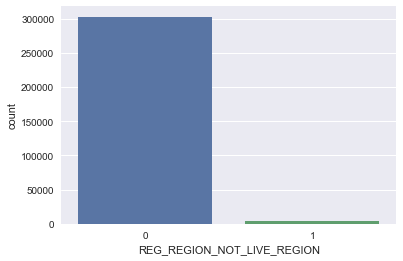

In [64]:
sns.countplot(df_train['REG_REGION_NOT_LIVE_REGION'])

In [67]:
for col in ['REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']:
    print(col, '\t', round(len(df_train[df_train[col] == 1])/len(df_train) * 100, 2))

REG_REGION_NOT_LIVE_REGION 	 1.51
REG_REGION_NOT_WORK_REGION 	 5.08
LIVE_REGION_NOT_WORK_REGION 	 4.07
REG_CITY_NOT_LIVE_CITY 	 7.82
REG_CITY_NOT_WORK_CITY 	 23.05
LIVE_CITY_NOT_WORK_CITY 	 17.96


In [51]:
temp = df_train[df_train['REGION_RATING_CLIENT_W_CITY'] == 3]

In [52]:
len(temp[temp['TARGET'] == 1])/len(temp)

0.1140218878248974

In [36]:
len(df_train[df_train['TARGET'] == 1])/len(df_train)

0.08072881945686496